<h2>Runge Kutta Method for Systems</h2>

  Consider the example
  \begin{align*}
    x'&=x+2y \\
    y'&=2x+y
  \end{align*}
  with $x(0)=0,y(0)=2$.

In [20]:
using DifferentialEquations
using Plots

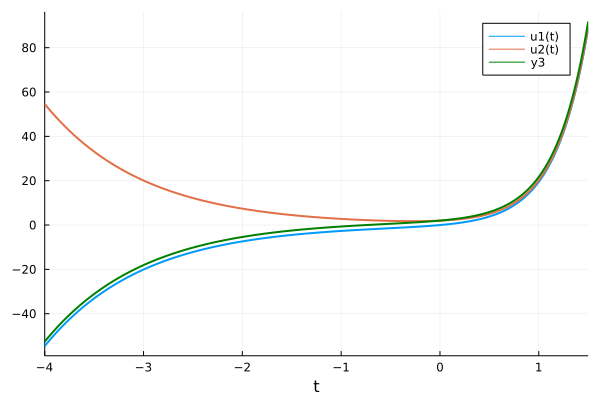

In [26]:
function sistem(du,u,p,t)
    du[1]=p[1]*u[1]+p[2]*u[2]+0
    du[2]=p[3]*u[1]+p[4]*u[2]+0
end
u0=[-exp(4)+exp(-12),exp(4)+exp(-12)]
p=(1,2,2,1)
tspan=(-4,1.5)
problem=ODEProblem(sistem,u0,tspan,p)
solution=solve(problem)
rng=range(-4,stop=1.5,length=500)
plot(solution,lw=2)
plot!(rng,-exp.(-rng) .+ exp.(3 .* rng) .+ 2,lw=2,lc=:green) # exact solution with an offset

In [22]:
t=[-4] # now let's try Runge-Kutta
E=[-exp(4)+exp(-12) exp(4)+exp(-12)]
h=0.1
f(t,x)=[x[1,1]+2*x[1,2] 2*x[1,1]+x[1,2]]
for i in 0:54
    k1=f(t[i+1,1]+i*h,transpose(E[i+1,:]))
    k2=f(t[i+1,1]+(i+(1/2))*h,transpose(E[i+1,:])+(1/2)*k1*h)
    k3=f(t[i+1,1]+(i+(1/2))*h,transpose(E[i+1,:])+(1/2)*k2*h)
    k4=f(t[i+1,1]+(i+1)*h,transpose(E[i+1,:])+k3*h)
    E=vcat(E,transpose(E[i+1,:])+h*(1/6)*(k1+2*k2+2*k3+k4))
    t=vcat(t,[t[1,1]+(i+1)*h])
end

In [23]:
E

56×2 Matrix{Float64}:
 -54.5981   54.5982
 -49.4024   49.4025
 -44.7012   44.7012
 -40.4473   40.4473
 -36.5982   36.5983
 -33.1154   33.1155
 -29.9641   29.9642
 -27.1126   27.1127
 -24.5325   24.5326
 -22.1979   22.1981
 -20.0854   20.0857
 -18.174    18.1743
 -16.4444   16.4449
   ⋮        
   2.64749   3.98813
   3.87197   5.08504
   5.49644   6.59407
   7.66353   8.6567
  10.5655   11.4642
  14.4617   15.2748
  19.7018   20.4376
  26.7579   27.4237
  36.267    36.8694
  49.0886   49.6337
  66.3829   66.8761
  89.7159   90.1621

In [24]:
t

56-element Vector{Float64}:
 -4.0
 -3.9
 -3.8
 -3.7
 -3.6
 -3.5
 -3.4
 -3.3
 -3.2
 -3.1
 -3.0
 -2.9
 -2.8
  ⋮
  0.40000000000000036
  0.5
  0.6000000000000005
  0.7000000000000002
  0.8000000000000007
  0.9000000000000004
  1.0
  1.1000000000000005
  1.2000000000000002
  1.3000000000000007
  1.4000000000000004
  1.5

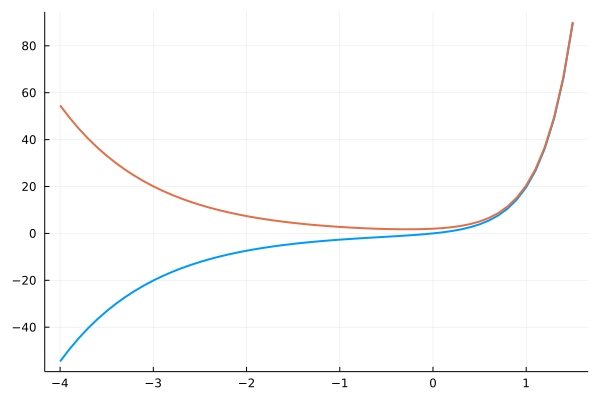

In [25]:
plot(t,E[:,1],line=2,leg=false)
plot!(t,E[:,2],line=2,leg=false)